<a href="https://colab.research.google.com/github/Tekleab15/N-gram-Language-Models/blob/main/N_gram_language_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Amharic Text Processing and N-gram model Generation in Google Colab**

In [1]:
from google.colab import drive
import tensorflow as tf
from collections import defaultdict
import re, csv
import pandas as pd
# Mount Google Drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Amharic_Corpus/Copy_of_GPAC.txt'

# Text cleaning
def clean_text(text):
    return re.sub(r'[^ሀ-ፐ0-9\s\-\.,!?]', '', text)
def create_ngrams(tokens, n):
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*1.1 Create n-grams for n=1, 2, 3, 4. You can show sample prints*

In [2]:
# Initialize defaultdict for n-grams and their frequencies
unigram_freq = defaultdict(int)
bigram_freq = defaultdict(int)
trigram_freq = defaultdict(int)
fourgram_freq = defaultdict(int)

# Generator function to read and clean lines from the file
def read_and_clean_lines(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            cleaned_line = clean_text(line)
            tokens = cleaned_line.split()
            if tokens:
                yield tokens

# Initialize defaultdict for n-grams and their frequencies
unigram_freq = defaultdict(int)
bigram_freq = defaultdict(int)
trigram_freq = defaultdict(int)
fourgram_freq = defaultdict(int)

# Process the file using the generator function
for tokens in read_and_clean_lines(file_path):
    for ngram in create_ngrams(tokens, 1):
        unigram_freq[ngram] += 1
    for ngram in create_ngrams(tokens, 2):
        bigram_freq[ngram] += 1
    for ngram in create_ngrams(tokens, 3):
        trigram_freq[ngram] += 1
    for ngram in create_ngrams(tokens, 4):
        fourgram_freq[ngram] += 1

# Print sample n-grams with their frequencies
print("         The first 10 n-gram representation: ")
print("Unigram: ", list(unigram_freq.items())[:10])
print("Bigram: ", list(bigram_freq.items())[:10])
print("Trigram: ", list(trigram_freq.items())[:10])
print("Fourgram: ", list(fourgram_freq.items())[:10])
print("\n\n\n")

         The first 10 n-gram representation: 
Unigram:  [('ምን', 43593), ('መሰላችሁ?', 942), ('አንባቢያን', 379), ('ኢትዮጵያ', 28031), ('በተደጋጋሚ', 4223), ('ጥሪው', 127), ('ደርሷት', 10), ('ልትታደመው', 1), ('ያልቻለችው', 24), ('የአለም', 1273)]
Bigram:  [('ምን መሰላችሁ?', 328), ('መሰላችሁ? አንባቢያን', 1), ('አንባቢያን ኢትዮጵያ', 1), ('ኢትዮጵያ በተደጋጋሚ', 9), ('በተደጋጋሚ ጥሪው', 1), ('ጥሪው ደርሷት', 1), ('ደርሷት ልትታደመው', 1), ('ልትታደመው ያልቻለችው', 1), ('ያልቻለችው የአለም', 1), ('የአለም የእግር', 5)]
Trigram:  [('ምን መሰላችሁ? አንባቢያን', 1), ('መሰላችሁ? አንባቢያን ኢትዮጵያ', 1), ('አንባቢያን ኢትዮጵያ በተደጋጋሚ', 1), ('ኢትዮጵያ በተደጋጋሚ ጥሪው', 1), ('በተደጋጋሚ ጥሪው ደርሷት', 1), ('ጥሪው ደርሷት ልትታደመው', 1), ('ደርሷት ልትታደመው ያልቻለችው', 1), ('ልትታደመው ያልቻለችው የአለም', 1), ('ያልቻለችው የአለም የእግር', 1), ('የአለም የእግር ኳስ', 5)]
Fourgram:  [('ምን መሰላችሁ? አንባቢያን ኢትዮጵያ', 1), ('መሰላችሁ? አንባቢያን ኢትዮጵያ በተደጋጋሚ', 1), ('አንባቢያን ኢትዮጵያ በተደጋጋሚ ጥሪው', 1), ('ኢትዮጵያ በተደጋጋሚ ጥሪው ደርሷት', 1), ('በተደጋጋሚ ጥሪው ደርሷት ልትታደመው', 1), ('ጥሪው ደርሷት ልትታደመው ያልቻለችው', 1), ('ደርሷት ልትታደመው ያልቻለችው የአለም', 1), ('ልትታደመው ያልቻለችው የአለም የእግር', 1), ('ያልቻለችው የአለም የእግር ኳስ', 1), ('የአለም የእግር ኳስ

*1.2 Calculate probabilities of n-grams and find the top 10 most likely n-grams for all n.*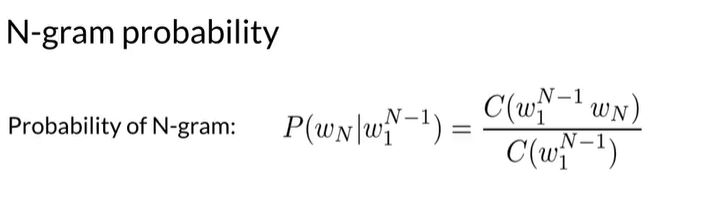

In [3]:
#Calculating total count of each counts
unigram_count = sum(unigram_freq.values())
bigram_count = sum(bigram_freq.values())
trigram_count = sum(trigram_freq.values())
fourgram_count = sum(fourgram_freq.values())

# Calculating probablities for each grams
def unigramProbablity(unigram):
  return unigram_freq[unigram] / unigram_count

def bigramProbablity(bigram):
  first_word = bigram.split()[0]
  return bigram_freq[bigram] / unigram_freq[first_word]

def trigramProbablity(trigram):
  first_two_words = " ".join(trigram.split()[:2])
  return trigram_freq[trigram] / bigram_freq[first_two_words]
def fourgramProbablity(fourgram):
  first_three_words = " ".join(fourgram.split()[:3])
  return fourgram_freq[fourgram] / trigram_freq[first_three_words]

# Calculate the probabilities of each grams(top ten)
top_ten_unigram = sorted(unigram_freq.items(), key=lambda x: x[1], reverse=True)[:10]
top_ten_bigram = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)[:10]
top_ten_trigram = sorted(trigram_freq.items(), key=lambda x: x[1], reverse=True)[:10]
top_ten_fourgram = sorted(fourgram_freq.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 most likely n-grams for all ngram
print("Top 10 Unigrams: ", top_ten_unigram)
print("Top 10 Bigrams: ", top_ten_bigram)
print("Top 10 Trigrams: ", top_ten_trigram)
print("Top 10 Fourgrams: ", top_ten_fourgram)

# Calculating the probability of the top n-grams
top_ten_unigram_prob = [(unigram, round(unigramProbablity(unigram),2)) for unigram, freq in top_ten_unigram]
top_ten_bigram_prob = [(bigram, round(bigramProbablity(bigram),2)) for bigram, freq in top_ten_bigram]
top_ten_trigram_prob = [(trigram, round(trigramProbablity(trigram),2)) for trigram, freq in top_ten_trigram]
top_ten_fourgram_prob = [(fourgram, round(fourgramProbablity(fourgram),2)) for fourgram, freq in top_ten_fourgram]
print("Top 10 Unigrams Probability: ", top_ten_unigram_prob)
print("Top 10 Bigrams Probability: ", top_ten_bigram_prob)
print("Top 10 Trigrams Probability: ", top_ten_trigram_prob)

Top 10 Unigrams:  [('ነው', 324514), ('ላይ', 205491), ('ውስጥ', 104513), ('ወደ', 88689), ('ግን', 86765), ('ጋር', 75879), ('ነበር', 73773), ('እና', 66925), ('ነገር', 64174), ('ጊዜ', 63284)]
Top 10 Bigrams:  [('ዓ ም', 32697), ('ነገር ግን', 14568), ('ብቻ ሳይሆን', 9897), ('ኤ አ', 8628), ('ማለት ነው', 8395), ('እ ኤ', 8285), ('ብቻ ነው', 7077), ('አዲስ አበባ', 6976), ('ምክር ቤት', 6907), ('በአዲስ አበባ', 6535)]
Top 10 Trigrams:  [('እ ኤ አ', 8227), ('2010 ዓ ም', 3547), ('2011 ዓ ም', 3037), ('ቀን 2010 ዓ', 3029), ('ቀን 2011 ዓ', 2701), ('ዓ ም ጀምሮ', 2125), ('2007 ዓ ም', 2110), ('2008 ዓ ም', 2040), ('2012 ዓ ም', 1921), ('ነው ነገር ግን', 1884)]
Top 10 Fourgrams:  [('ቀን 2010 ዓ ም', 3028), ('ቀን 2011 ዓ ም', 2700), ('ቀን 2008 ዓ ም', 1754), ('ቀን 2007 ዓ ም', 1715), ('ቀን 2012 ዓ ም', 1706), ('ሚኒስትር ዓብይ አህመድ ዶር', 1075), ('አመለካከት ብቻ የሚያንፀባርቅ መሆኑን', 944), ('የጸሐፊውን አመለካከት ብቻ የሚያንፀባርቅ', 923), ('ጽሑፉ የጸሐፊውን አመለካከት ብቻ', 919), ('የአዲስ አበባ ከተማ አስተዳደር', 777)]
Top 10 Unigrams Probability:  [('ነው', 0.02), ('ላይ', 0.01), ('ውስጥ', 0.0), ('ወደ', 0.0), ('ግን', 0.0), ('ጋር', 0.0), ('ነበር'

1.3 Calculate the conditional probability of a word given the previous word using
bigrams.
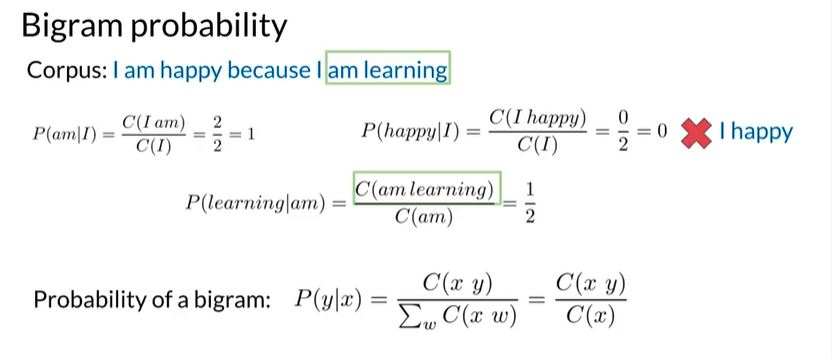

In [4]:
# Function to calculate the conditional probability of a word given the previous word using bigrams
def conditional_prob(bigram):
    first_word = bigram.split()[0]
    return bigram_freq[bigram] / unigram_freq[first_word]
# Calculate the conditional probability for a specific bigram
example_bigram = "አለም አቀፍ"
if example_bigram in bigram_freq:
    example_prob = round(conditional_prob(example_bigram), 2)
    print(f"Conditional probability of '{example_bigram}': {example_prob}")
else:
    print(f"Bigram '{example_bigram}' not found in the dataset.")

# Calculate and print the conditional probabilities for the top 10 bigrams
print("\nTop 10 Bigrams with Conditional Probabilities:")
for bigram, freq in top_ten_bigram:
    print(f"{bigram}: {round(conditional_prob(bigram), 2)}")


Conditional probability of 'አለም አቀፍ': 0.15

Top 10 Bigrams with Conditional Probabilities:
ዓ ም: 0.99
ነገር ግን: 0.23
ብቻ ሳይሆን: 0.19
ኤ አ: 0.92
ማለት ነው: 0.27
እ ኤ: 0.92
ብቻ ነው: 0.13
አዲስ አበባ: 0.31
ምክር ቤት: 0.58
በአዲስ አበባ: 0.71


1.4 Remove common stopwords and recompute bigram and trigram frequencies, find
the top 10 n-grams; n=1,2,3,4.(OPTIONAL) # FIND THE MOST COMMON AMHARIC
STOPWORDS BY YOURSELF

In [2]:
amharic_stopwords = [
    'ለማለት', 'እነዚህ', 'ለምን', 'እንደሚሰራ', 'እንደገና', 'እንዲያ', 'ነበልባል', 'በስተ', 'እንዲ', 'ም', 'እስኪ', 'ስለ', 'በርቀት', 'አላቸው', 'እንዲህ', 'የ', 'እንደዚያ', 'ውስጥ', 'በታች', 'ኋላ', 'እንደ', 'ነበር', 'ከዚህ', 'ሶስት', 'አለ',
    'እንዲሆኑ', 'ከእነነዚህ', 'ማንኛውን', 'ያ', 'ሁሉ', 'ቀደም', 'እንደሚል', 'እሱ', 'እነሆ', 'እናንተ', 'በኩል', 'እንደሆኑ','ነው', 'ለማን', 'ወደ', 'እነዚያ', 'አንዳንድ', 'እንደሆነ', 'እንዴት', 'ከውጭ', 'ማንኛውንም', 'በውስጥ', 'ሁለት', 'በመካከል',
    'አንድ', 'ይሄ', 'አንቺ', 'የራሱ', 'እኔ', 'አሁን', 'እስከ', 'እንደዚህ', 'ከ', 'እዚያ', 'እንደሚታይ', 'እንደነበረ', 'እንደነበር','በመስራት', 'በመሆኑ', 'ከተከታታይ', 'እነሱ', 'የአብዛኛውን', 'በላይ', 'እንዳይሆን', 'ይ', 'አንድን', 'እንዲሆን', 'ማለት', 'በተአምራቾች',
    'እንስ', 'በ', 'እንደሆነም', 'በኋላ', 'አብዛኛውን', 'ና', 'ምን', 'አንተ', 'ከላይ', 'ከሁሉም', 'እና', 'ደግሞ', 'ብዙ', 'እንዴ', 'ጥቂት', 'ያለ', 'በተለይ', 'እዚህ', 'እንዲቀጥሉ', 'እንዲህም', 'ላይ', 'አስተባባሪዎች', 'እኛ', 'ለተ','ተከታታይ',
    'ያን', 'እንደሚያስፈልግ', 'በራሱ', 'እሷ', 'ለማንኛው', 'እንደሚሆን', 'በፊት', 'አይ', 'ከእነዚህ', 'ይህ'
]
def stopWordCleanText(text):
    text = re.sub(r'[^ሀ-ፐ0-9\s\-\.,!?]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in amharic_stopwords]
    return ' '.join(tokens)
# Create N-grams
def create_ngrams(tokens, n):
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

# Initialize defaultdict for n-grams and their frequencies
stopword_unigram_freq = defaultdict(int)
stopword_bigram_freq = defaultdict(int)
stopword_trigram_freq = defaultdict(int)
stopword_fourgram_freq = defaultdict(int)

def read_and_clean_lines(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            cleaned_line = stopWordCleanText(line)
            tokens = cleaned_line.split()
            if tokens:
                yield tokens

for tokens in read_and_clean_lines(file_path):
    for ngram in create_ngrams(tokens, 1):
        stopword_unigram_freq[ngram] += 1
    for ngram in create_ngrams(tokens, 2):
        stopword_bigram_freq[ngram] += 1
    for ngram in create_ngrams(tokens, 3):
        stopword_trigram_freq[ngram] += 1
    for ngram in create_ngrams(tokens, 4):
        stopword_fourgram_freq[ngram] += 1

top_stopword_unigrams = sorted(stopword_unigram_freq.items(), key=lambda x: x[1], reverse=True)[:10]
top_stopword_bigrams = sorted(stopword_bigram_freq.items(), key=lambda x: x[1], reverse=True)[:10]
top_stopword_trigrams = sorted(stopword_trigram_freq.items(), key=lambda x: x[1], reverse=True)[:10]
top_stopword_fourgrams = sorted(stopword_fourgram_freq.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 n-grams for each n
print("Top 10 Unigrams after Stopword Removal:", top_stopword_unigrams)
print("Top 10 Bigrams after Stopword Removal:", top_stopword_bigrams)
print("Top 10 Trigrams after Stopword Removal:", top_stopword_trigrams)
print("Top 10 Fourgrams after Stopword Removal:", top_stopword_fourgrams)

Top 10 Unigrams after Stopword Removal: [('ግን', 86765), ('ጋር', 75879), ('ነገር', 64174), ('ጊዜ', 63284), ('ብቻ', 52462), ('ቤት', 44835), ('ወይም', 41916), ('አቶ', 41252), ('ሰው', 40411), ('ናቸው', 37610)]
Top 10 Bigrams after Stopword Removal: [('ነገር ግን', 14627), ('ብቻ ሳይሆን', 9905), ('ኤ አ', 8628), ('እ ኤ', 8285), ('አዲስ አበባ', 6978), ('ምክር ቤት', 6907), ('በአዲስ አበባ', 6535), ('ዓለም አቀፍ', 5809), ('ሚሊዮን ብር', 5802), ('በአሁኑ ወቅት', 5344)]
Top 10 Trigrams after Stopword Removal: [('እ ኤ አ', 8227), ('ቀን 2010 ዓ', 3029), ('ቀን 2011 ዓ', 2701), ('ተወካዮች ምክር ቤት', 1866), ('ቀን 2008 ዓ', 1756), ('ቀን 2007 ዓ', 1715), ('ቀን 2012 ዓ', 1707), ('አበባ ከተማ አስተዳደር', 1479), ('የአዲስ አበባ ከተማ', 1361), ('በዓለም አቀፍ ደረጃ', 1229)]
Top 10 Fourgrams after Stopword Removal: [('ሚኒስትር ዓብይ አህመድ ዶር', 1075), ('አመለካከት ብቻ የሚያንፀባርቅ መሆኑን', 944), ('የጸሐፊውን አመለካከት ብቻ የሚያንፀባርቅ', 923), ('ጽሑፉ የጸሐፊውን አመለካከት ብቻ', 919), ('የአዲስ አበባ ከተማ አስተዳደር', 777), ('የሕዝብ ተወካዮች ምክር ቤት', 743), ('ወሮበላ የዘራፊ ቡድን ስብስብ', 721), ('ጠቅላይ ሚኒስትር ዓብይ አህመድ', 719), ('የወያኔ ወሮበላ የዘራፊ ቡድን', 571), ('ጠቅ

1.5 Create word clouds for unigrams, bigrams, and trigrams before and after stop word
removal. (OPTIONAL)

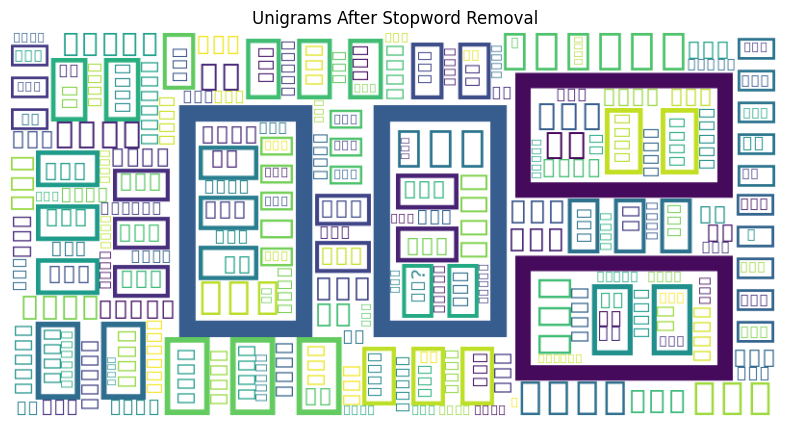

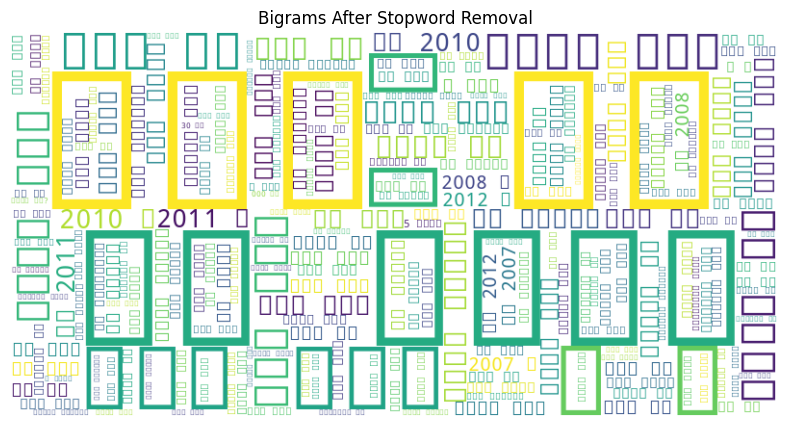

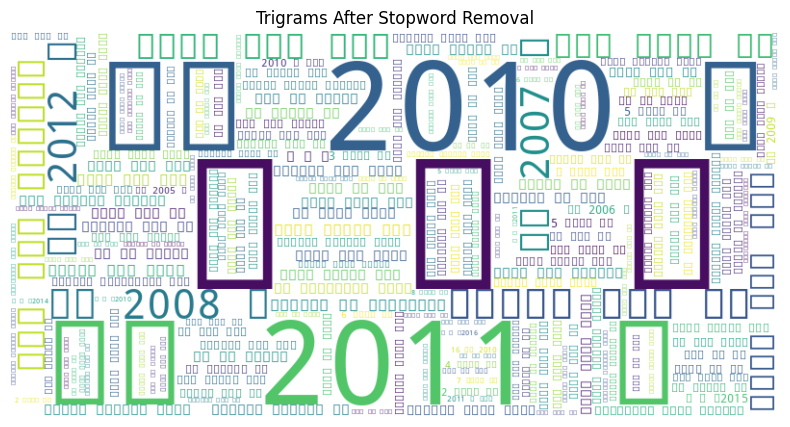

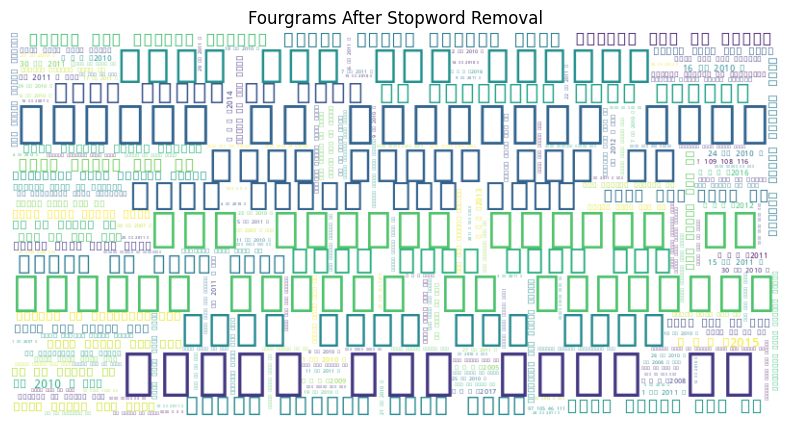

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def generate_word_cloud(freq_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(freq_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
# Generate word clouds for n-grams before and after stop word removal
def generate_all_word_clouds(file_path):
    # Before stop word removal
    # generate_word_cloud(unigram_freq, "Unigrams Before Stopword Removal")
    # generate_word_cloud(bigram_freq, "Bigrams Before Stopword Removal")
    # generate_word_cloud(trigram_freq, "Trigrams Before Stopword Removal")

    # After stop word removal
    # unigram_freq, bigram_freq, trigram_freq = ngram_frequencies(file_path, stopWordCleanText)
    generate_word_cloud(stopword_unigram_freq, "Unigrams After Stopword Removal")
    generate_word_cloud(stopword_bigram_freq, "Bigrams After Stopword Removal")
    generate_word_cloud(stopword_trigram_freq, "Trigrams After Stopword Removal")
    generate_word_cloud(stopword_fourgram_freq, "Fourgrams After Stopword Removal")

generate_all_word_clouds(file_path)


1.6 What is the probability of the sentence. "ኢትዮጵያ ታሪካዊ ሀገር ናት ". You can also try
more sentences.
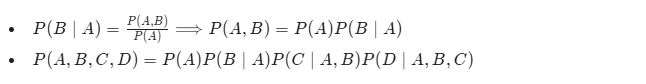

In [9]:
stop_unigram_count = sum(stopword_unigram_freq.values())
stop_bigram_count = sum(stopword_bigram_freq.values())
stop_trigram_count = sum(stopword_trigram_freq.values())
stop_fourgram_count = sum(stopword_fourgram_freq.values())
print(stop_fourgram_count)
def unigram_prob(word):
    return stopword_unigram_freq.get(word, 1e-6) / stop_unigram_count
def bigram_prob(bigram):
    first_word = bigram.split()[0]
    return stopword_bigram_freq.get(bigram, 1e-6) / stopword_unigram_freq.get(first_word, 1e-6)
def trigram_prob(trigram):
    first_two_words = " ".join(trigram.split()[:2])
    return stopword_trigram_freq.get(trigram, 1e-6) / stopword_bigram_freq.get(first_two_words, 1e-6)
def fourgram_prob(fourgram):
    first_three_words = " ".join(fourgram.split()[:3])
    fourgram_frequency = stopword_fourgram_freq.get(fourgram, 0)
    trigram_frequency = stopword_trigram_freq.get(first_three_words, 1e-6)
    return fourgram_frequency / trigram_frequency

19470905


In [10]:
# Sentence to calculate probability for
sentence = "ኢትዮጵያ ታሪካዊ ሀገር ናት"
words = sentence.split()
# Calculate sentence probability using unigrams
unigram_sentence_prob = 1.0
for word in words:
    unigram_sentence_prob *= unigram_prob(word)
bigram_sentence_prob = 1.0
for i in range(len(words) - 1):
    bigram = f"{words[i]} {words[i+1]}"
    bigram_sentence_prob *= bigram_prob(bigram)

trigram_sentence_prob = 1.0
for i in range(len(words) - 2):
    trigram = f"{words[i]} {words[i+1]} {words[i+2]}"
    trigram_sentence_prob *= trigram_prob(trigram)
fourgram_sentence_prob = 1.0
for i in range(len(words) - 3):
    fourgram = f"{words[i]} {words[i+1]} {words[i+2]} {words[i+3]}"
    fourgram_sentence_prob *= fourgram_prob(fourgram)

print(f"Unigram Probability of '{sentence}': {unigram_sentence_prob}")
print(f"Bigram Probability of '{sentence}': {bigram_sentence_prob}")
print(f"Trigram Probability of '{sentence}': {trigram_sentence_prob}")
print(f"Fourgram Probability of '{sentence}': {fourgram_sentence_prob}")

Fourgram: ኢትዮጵያ ታሪካዊ ሀገር ናት, Frequency: 0, Trigram: ኢትዮጵያ ታሪካዊ ሀገር, Frequency: 1e-06
Unigram Probability of 'ኢትዮጵያ ታሪካዊ ሀገር ናት': 2.5345639885052708e-14
Bigram Probability of 'ኢትዮጵያ ታሪካዊ ሀገር ናት': 9.29092848333966e-09
Trigram Probability of 'ኢትዮጵያ ታሪካዊ ሀገር ናት': 2.2727272727272725e-08
Fourgram Probability of 'ኢትዮጵያ ታሪካዊ ሀገር ናት': 0.0


1.7 Generate random sentences using n-grams; explain what happens as n-increases
based on your output.

In [15]:
import random
# Function to generate a random sentence using unigrams
def generate_sentence_unigram(unigram_freq, length=10):
    words = list(unigram_freq.keys())
    sentence = [random.choice(words) for _ in range(length)]
    return ' '.join(sentence)
def generate_sentence_bigram(bigram_freq, start_word=None, length=10):
    if not start_word:
        start_word = random.choice(list(bigram_freq.keys())).split()[0]
    sentence = [start_word]
    for _ in range(length - 1):
        candidates = [bigram.split()[1] for bigram in bigram_freq if bigram.split()[0] == sentence[-1]]
        if not candidates:
            break
        next_word = random.choice(candidates)
        sentence.append(next_word)
    return ' '.join(sentence)
# Function to generate a random sentence using trigrams
def generate_sentence_trigram(trigram_freq, start_words=None, length=10):
    if not start_words:
        start_words = random.choice(list(trigram_freq.keys())).split()[:2]
    sentence = start_words
    for _ in range(length - 2):
        candidates = [trigram.split()[2] for trigram in trigram_freq if trigram.split()[:2] == sentence[-2:]]
        if not candidates:
            break
        next_word = random.choice(candidates)
        sentence.append(next_word)
    return ' '.join(sentence)
def generate_sentence_fourgram(fourgram_freq, trigram_freq, start_words=None, length=15):
    if not start_words:
        start_words = random.choice(list(fourgram_freq.keys())).split()[:3]
    sentence = start_words
    for _ in range(length - 3):
        candidates = [fourgram.split()[3] for fourgram in fourgram_freq if fourgram.split()[:3] == sentence[-3:]]
        if not candidates:
            break
        next_word = random.choice(candidates)
        sentence.append(next_word)
    return ' '.join(sentence)
unigram_sentence = generate_sentence_unigram(stopword_unigram_freq)
bigram_sentence = generate_sentence_bigram(stopword_bigram_freq)
trigram_sentence = generate_sentence_trigram(stopword_trigram_freq)
fourgram_sentence = generate_sentence_fourgram(stopword_fourgram_freq, stopword_trigram_freq)

print("Random Unigram Sentence:", unigram_sentence)
print("Random Bigram Sentence:", bigram_sentence)
print("Random Trigram Sentence:", trigram_sentence)
print("Random Fourgram Sentence:",fourgram_sentence)

Random Unigram Sentence: ገልጸዋልበተፈቀደላቸው እንዳልተፈተሸ ይሸረሽረው ይገኛልበበና ከብረወሰኖች የሚሽከረክረው 2760 ስትደመድም ስለሞተችባቸው የሚያስጠነቅቁትም
Random Bigram Sentence: ታዲያ? መጀመርያ መድበለ ዘውግ የሱን መንቃት ነበረብኝ እንዳልኳችሁ የአሁኗ ሳተላይት
Random Trigram Sentence: የአይዳን ድጋፍ የሚያገኙ የብሔር ብሔረሰብ መሠረታዊ መብቶች በሕግ ሲከበሩ አንዱ
Random Fourgram Sentence: ለኮሮና ቫይረስ ሥርጭት ምክንያት ሊሆን ይችላል በኋላም ከአንዳንድ ጽሑፎች አንብቤ እንደተረዳሁት የማግለል አካሄድ በስቶክ ገበያ


Quest: What happens as n increases

**nigram (n=1):**
Sentence Structure: The sentence is often a random collection of words without coherence. Ex: "ገልጸዋልበተፈቀደላቸው እንዳልተፈተሸ ይሸረሽረው ይገኛልበበና ከብረወሰኖች የሚሽከረክረው 2760 ስትደመድም ስለሞተችባቸው የሚያስጠነቅቁትም"

**Bigram (n=2):**
Sentence Structure: The sentence starts to make more sense since each word is chosen based on the previous word, providing some context.
Ex: "ታዲያ? መጀመርያ መድበለ ዘውግ የሱን መንቃት ነበረብኝ እንዳልኳችሁ የአሁኗ ሳተላይት"

**Trigram (n=3):**
Sentence Structure: The sentence becomes even more coherent and meaningful because each word is chosen based on the previous two words, capturing more context and patterns from the text.
Ex: "የአይዳን ድጋፍ የሚያገኙ የብሔር ብሔረሰብ መሠረታዊ መብቶች በሕግ ሲከበሩ አንዱ"

**Fourgram (n=4)**: Each word is chosen based on the previous three words. This higher-order n-gram captures even more context, resulting in sentences that are even more coherent and contextually relevant. Ex: ለኮሮና ቫይረስ ሥርጭት ምክንያት ሊሆን ይችላል በኋላም ከአንዳንድ ጽሑፎች አንብቤ እንደተረዳሁት የማግለል አካሄድ በስቶክ ገበያ



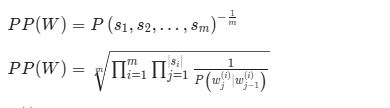

#2. Evaluate these Language Models Using Intrinsic Evaluation Method (Perplexity)

In [20]:
# Function to calculate perplexity
import math
def calculate_perplexity(test_set, prob_function, epsilon=1e-10):
    log_prob = 0
    for ngram in test_set:
        probability = prob_function(ngram)
        log_prob += math.log2(probability + epsilon)
    avg_log_prob = log_prob / len(test_set)
    perplexity = 2 ** (-avg_log_prob)
    return perplexity
# Example test sets (Example values)
test_set_unigrams = ['ኢትዮጵያ', 'ታሪካዊ', 'ሀገር', 'ናት']
test_set_bigrams = ['ኢትዮጵያ ታሪካዊ', 'ታሪካዊ ሀገር', 'ሀገር ናት']
test_set_trigrams = ['ኢትዮጵያ ታሪካዊ ሀገር', 'ታሪካዊ ሀገር ናት']
test_set_fourgrams = ['ኢትዮጵያ ታሪካዊ ሀገር ናት']

# Calculate perplexity for each n-gram model
perplexity_unigram = calculate_perplexity(test_set_unigrams, unigram_prob)
perplexity_bigram = calculate_perplexity(test_set_bigrams, bigram_prob)
perplexity_trigram = calculate_perplexity(test_set_trigrams, trigram_prob)
perplexity_fourgram = calculate_perplexity(test_set_fourgrams, fourgram_prob)

print(f"Unigram Perplexity: {perplexity_unigram}")
print(f"Bigram Perplexity: {perplexity_bigram}")
print(f"Trigram Perplexity: {perplexity_trigram}")
print(f"Fourgram Perplexity: {perplexity_fourgram}")

Fourgram: ኢትዮጵያ ታሪካዊ ሀገር ናት, Frequency: 0, Trigram: ኢትዮጵያ ታሪካዊ ሀገር, Frequency: 1e-06
Unigram Perplexity: 2506.2479845447683
Bigram Perplexity: 475.678562528085
Trigram Perplexity: 6629.604299196123
Fourgram Perplexity: 10000000000.000008


BONUS 2 OPTIONAL
#3 Evaluate these Language Models Using Extrinsic Evaluation Method
You can make use of any task convenient to you to evaluate the n-gram models you
have created.